Epoch 1/5
1500/1500 [==============================] - 5s 2ms/step - loss: 0.2619 - accuracy: 0.9233 - val_loss: 0.1322 - val_accuracy: 0.9612
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1087 - accuracy: 0.9664 - val_loss: 0.1151 - val_accuracy: 0.9645
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0768 - accuracy: 0.9766 - val_loss: 0.0964 - val_accuracy: 0.9702
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0572 - accuracy: 0.9820 - val_loss: 0.0893 - val_accuracy: 0.9730
Epoch 5/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0439 - accuracy: 0.9862 - val_loss: 0.0935 - val_accuracy: 0.9737
Epochs: 5, Validation Loss: 0.0869, Validation Accuracy: 0.9770
Epoch 1/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0364 - accuracy: 0.9880 - val_loss: 0.1231 - val_accuracy: 0.9683
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0

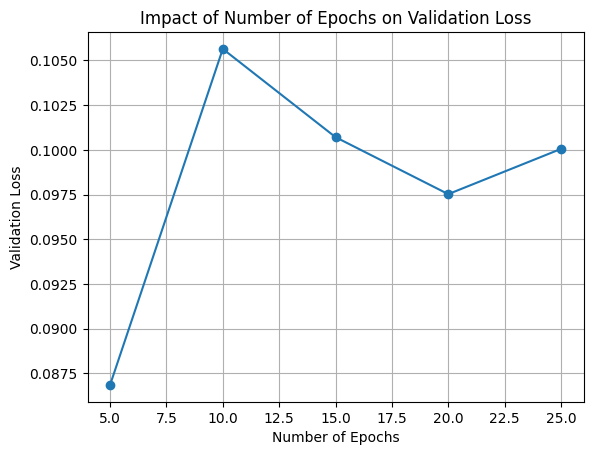

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocess the data
X_train = X_train.reshape(-1, 28*28) / 255.0
X_test = X_test.reshape(-1, 28*28) / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define a simple neural network
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(784,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with varying epochs
epochs_range = [5, 10, 15, 20, 25]
val_loss_list = []

for epochs in epochs_range:
    # Define early stopping callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

    # Train the model
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_split=0.2, callbacks=[early_stopping], verbose=1)

    # Evaluate the model on validation set
    val_loss, val_accuracy = model.evaluate(X_test, y_test, verbose=0)
    val_loss_list.append(val_loss)

    print(f'Epochs: {epochs}, Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}')

# Plot validation loss vs. number of epochs
plt.plot(epochs_range, val_loss_list, marker='o')
plt.xlabel('Number of Epochs')
plt.ylabel('Validation Loss')
plt.title('Impact of Number of Epochs on Validation Loss')
plt.grid(True)
plt.show()


In [ ]:
#We load the MNIST dataset and preprocess it
#We defined a simple neural network with two hidden layers and compiled it
#We trained the model with varying numbers of epochs (5, 10, 15, 20, 25) and monitored the validation loss
#We used early stopping to stop training when validation loss stopped decreasing
#We evaluated the model's performance on the validation set and plotted the validation loss vs. number of epochs to observe the impact of selecting the number of epochs.